In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
car = pd.read_excel("D:/EDA/Workspace/Cars.xlsx")
car.head()

,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),16,26,p,compact


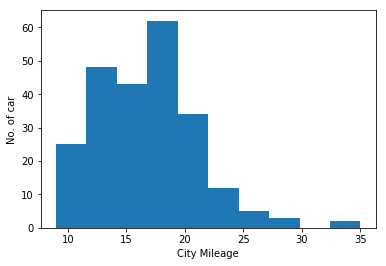

In [3]:
plt.hist(car['cty'])
plt.xlabel('City Mileage')
plt.ylabel('No. of car')

plt.show()

In [4]:
car.skew()

displ    0.444316
year     0.000000
cyl      0.113800
cty      0.796561
hwy      0.369236
dtype: float64

In [5]:
car['cty_sqrt'] = np.sqrt(car['cty'])
car.skew()

displ       0.444316
year        0.000000
cyl         0.113800
cty         0.796561
hwy         0.369236
cty_sqrt    0.359486
dtype: float64

In [6]:
car.head()

,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,class,cty_sqrt
0,audi,a4,1.8,1999,4,auto(l5),18,29,p,compact,4.242641
1,audi,a4,1.8,1999,4,manual(m5),21,29,p,compact,4.582576
2,audi,a4,2.0,2008,4,manual(m6),20,31,p,compact,4.472136
3,audi,a4,2.0,2008,4,auto(av),21,30,p,compact,4.582576
4,audi,a4,2.8,1999,6,auto(l5),16,26,p,compact,4.000000


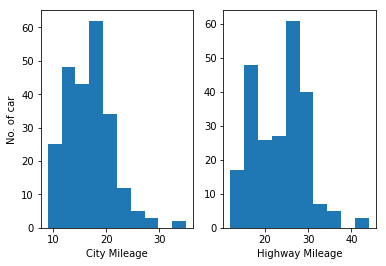

In [7]:
# Matplotlib subplot

fig = plt.figure()

plt.subplot(1,2,1)

plt.hist(car['cty'])
plt.xlabel('City Mileage')
plt.ylabel('No. of car')

plt.subplot(1,2,2)

plt.hist(car['hwy'])
plt.xlabel('Highway Mileage')

plt.show()

In [8]:
!pip install seaborn

In [9]:
import seaborn as sns

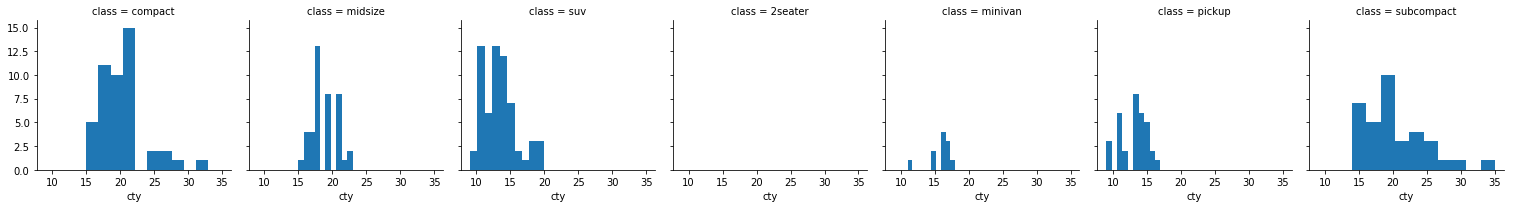

In [10]:
g = sns.FacetGrid(car, col="class")
g = g.map(plt.hist, "cty")

In [11]:
z = car['cty'].describe()
z

count    234.000000
mean      16.858974
std        4.255946
min        9.000000
25%       14.000000
50%       17.000000
75%       19.000000
max       35.000000
Name: cty, dtype: float64

In [12]:
q1 = z['25%']
q3 = z['75%']
IQR = q3-q1
UL = q3+1.5*IQR
LL = q1-1.5*IQR
car['Outer'] = np.where(((car['cty'] > UL) | (car['cty'] < LL)),"outlier","safty")
car1 = car[(car['Outer'] == 'outlier')]
car1

,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,class,cty_sqrt,Outer
99,honda,civic,1.6,1999,4,manual(m5),28,33,r,subcompact,5.291503,outlier
196,toyota,corolla,1.8,2008,4,manual(m5),28,37,r,compact,5.291503,outlier
212,volkswagen,jetta,1.9,1999,4,manual(m5),33,44,d,compact,5.744563,outlier
221,volkswagen,new beetle,1.9,1999,4,manual(m5),35,44,d,subcompact,5.916080,outlier
222,volkswagen,new beetle,1.9,1999,4,auto(l4),29,41,d,subcompact,5.385165,outlier


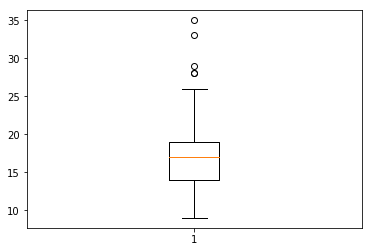

In [13]:
plt.boxplot(car['cty'])
plt.show()

In [14]:
np.quantile(car['cty'],0.25) ## Alterative to find Q1

14.0

In [15]:
car['class'].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [39]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [10,5]

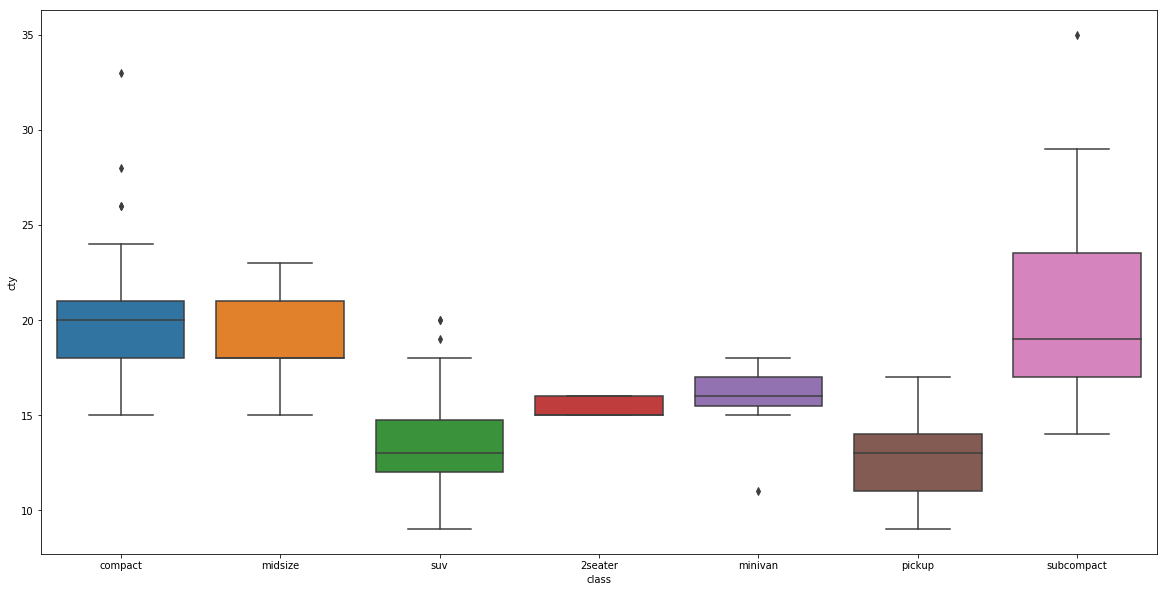

In [29]:
## Creating one box plot for each class

sns.boxplot(data=car, x='class', y='cty')

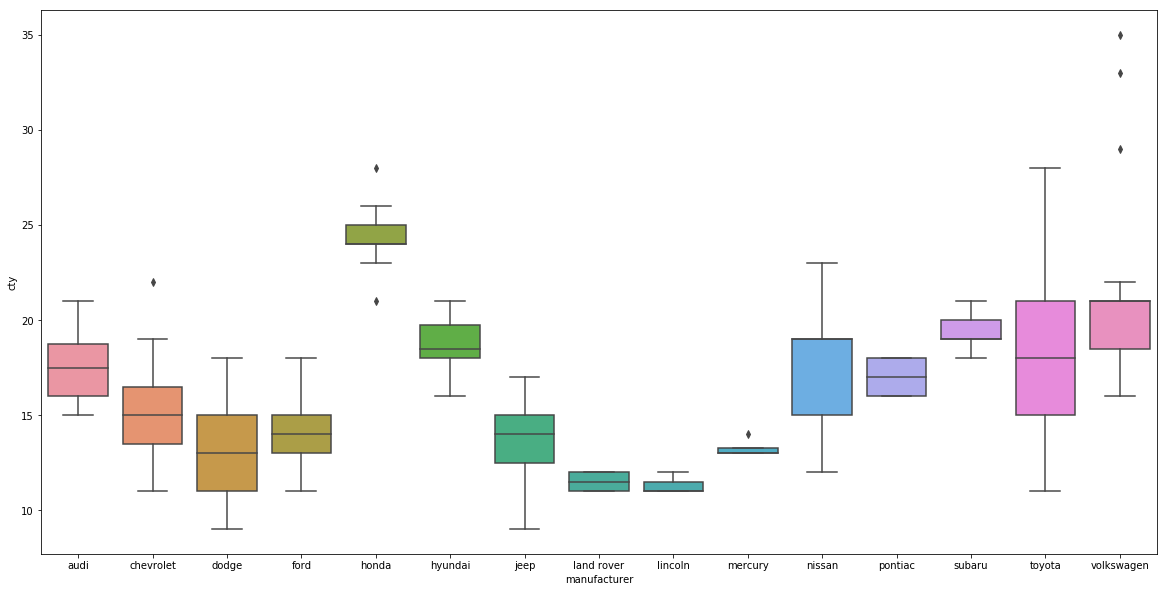

In [30]:
## Creating one box plot for each manufacturer

sns.boxplot(data=car, x='manufacturer', y='cty')

In [17]:
?sns.boxplot

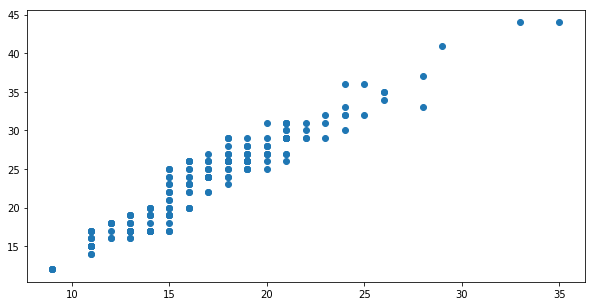

In [40]:
plt.scatter(car['cty'],car['hwy'])
plt.show()

In [43]:
## Correlation between city milage and high milage

car_new = car[['cty','hwy','displ','cyl']]
Matrix = car_new.corr()
Matrix

,cty,hwy,displ,cyl
cty,1.000000,0.955916,-0.798524,-0.805771
hwy,0.955916,1.000000,-0.766020,-0.761912
displ,-0.798524,-0.766020,1.000000,0.930227
cyl,-0.805771,-0.761912,0.930227,1.000000


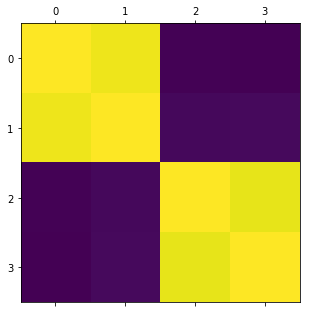

In [45]:
plt.matshow(Matrix)
plt.show()

In [47]:
!pip install pydataset

  Running setup.py bdist_wheel for pydataset: started
  Running setup.py bdist_wheel for pydataset: finished with status 'done'
  Stored in directory: C:\Users\Administrator\AppData\Local\pip\Cache\wheels\fe\3f\dc\5d02ccc767317191b12d042dd920fcf3432fab74bc7978598b
Successfully built pydataset


In [48]:
from pydataset import data

df = data('mtcars')
df.head()

initiated datasets repo at: C:\Users\Administrator\.pydataset/


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [51]:
data()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
5,InsectSprays,Effectiveness of Insect Sprays
6,JohnsonJohnson,Quarterly Earnings per Johnson & Johnson Share
7,LakeHuron,Level of Lake Huron 1875-1972
8,LifeCycleSavings,Intercountry Life-Cycle Savings Data
9,Nile,Flow of the River Nile


In [52]:
Matrix = df.corr()
Matrix

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


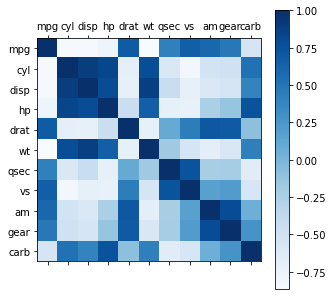

In [60]:
plt.matshow(Matrix, cmap = 'Blues',annot = )

plt.xticks(range(len(Matrix.columns)),Matrix.columns)
plt.yticks(range(len(Matrix.columns)),Matrix.columns)

plt.colorbar()
plt.show()

In [63]:
?plt.annot

Object `plt.annot` not found.
